In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

In [33]:
import requests as rq
response=rq.get('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0232EN-SkillsNetwork/asset/iris_data.csv')
with open('iris_data.csv','w') as f:
    f.write(response.text)

df=pd.read_csv('iris_data.csv')
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [18]:
print(df.columns.tolist())
print('-----------')
print(df.dtypes)
print('------------')
print(df.shape[0])

['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
-----------
sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object
------------
150


In [27]:
df['species'].replace('Iris-', '',inplace=True)

In [30]:
df.value_counts()

sepal_length  sepal_width  petal_length  petal_width  species   
4.9           3.1          1.5           0.1          setosa        3
5.8           2.7          5.1           1.9          virginica     2
              4.0          1.2           0.2          setosa        1
5.9           3.0          4.2           1.5          versicolor    1
6.2           3.4          5.4           2.3          virginica     1
                                                                   ..
5.5           2.3          4.0           1.3          versicolor    1
              2.4          3.7           1.0          versicolor    1
                           3.8           1.1          versicolor    1
              2.5          4.0           1.3          versicolor    1
7.9           3.8          6.4           2.0          virginica     1
Name: count, Length: 147, dtype: int64

In [41]:
stats=df.describe()
stats.loc['range']=stats.loc['max']-stats.loc['min']
stats

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000
range,3.600000,2.400000,5.900000,2.400000


In [45]:
out_fields=['mean','25%','50%','75%','range']
stats.loc[out_fields]
stats.rename({'50%':'median'},inplace=True)
stats

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
median,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000
range,3.600000,2.400000,5.900000,2.400000


In [47]:
df.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.418,1.464,0.244
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [48]:
df.groupby('species').median()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.0,3.4,1.50,0.2
versicolor,5.9,2.8,4.35,1.3
virginica,6.5,3.0,5.55,2.0


In [49]:
df.groupby('species').agg(['mean','median'])

sepal_length        sepal_width        petal_length         \
                   mean median        mean median         mean median   
species                                                                 
setosa            5.006    5.0       3.418    3.4        1.464   1.50   
versicolor        5.936    5.9       2.770    2.8        4.260   4.35   
virginica         6.588    6.5       2.974    3.0        5.552   5.55   

           petal_width         
                  mean median  
species                        
setosa           0.244    0.2  
versicolor       1.326    1.3  
virginica        2.026    2.0

In [50]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Sepal Length vs Width')

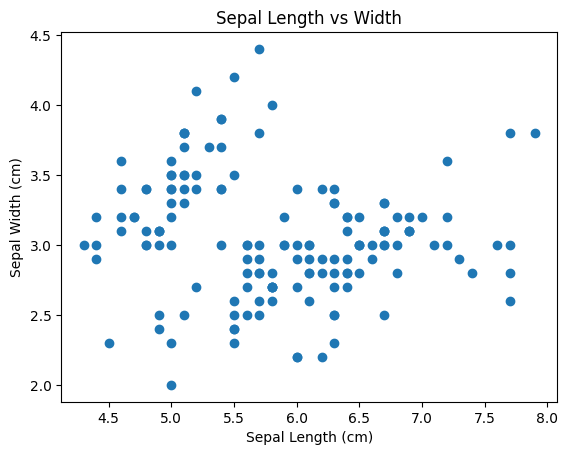

In [53]:
plt.scatter(df['sepal_length'],df['sepal_width'])
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Sepal Length vs Width')

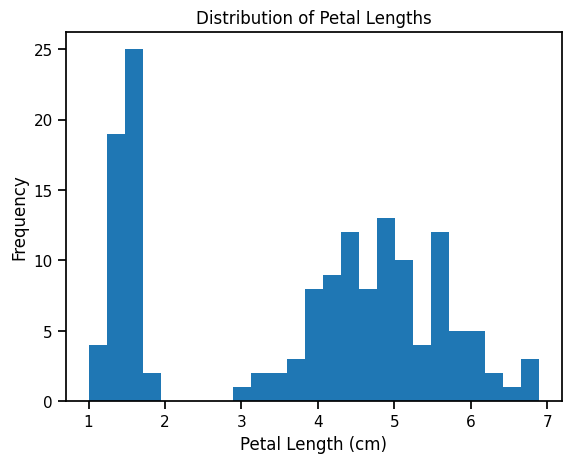

In [64]:
ax=plt.axes()
ax.hist(df['petal_length'],bins=25)
ax.set(xlabel='Petal Length (cm)', 
       ylabel='Frequency',
       title='Distribution of Petal Lengths');

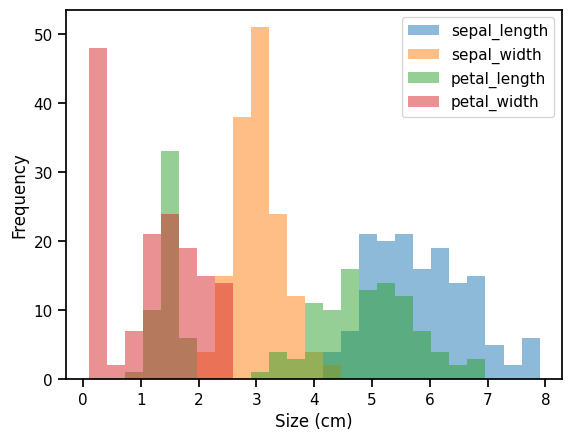

In [61]:
ax = df.plot.hist(bins=25, alpha=0.5)
ax.set_xlabel('Size (cm)');

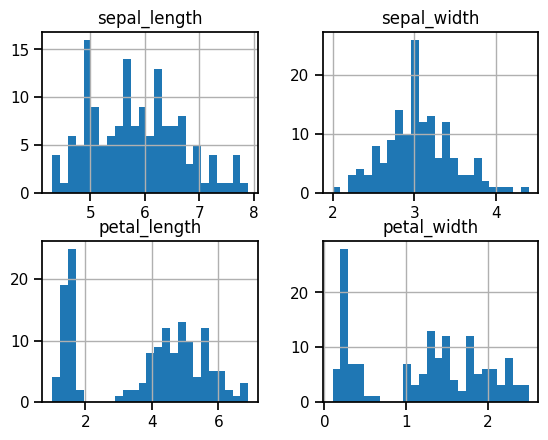

In [67]:
axList = df.hist(bins=25)

# Add some x- and y- labels to first column and last row


array([[<Axes: title={'center': 'petal_length'}, xlabel='[species]'>,
        <Axes: title={'center': 'petal_width'}, xlabel='[species]'>],
       [<Axes: title={'center': 'sepal_length'}, xlabel='[species]'>,
        <Axes: title={'center': 'sepal_width'}, xlabel='[species]'>]],
      dtype=object)

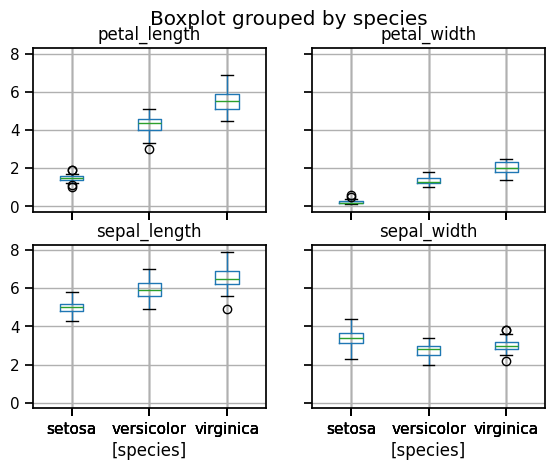

In [70]:
df.boxplot(by='species')

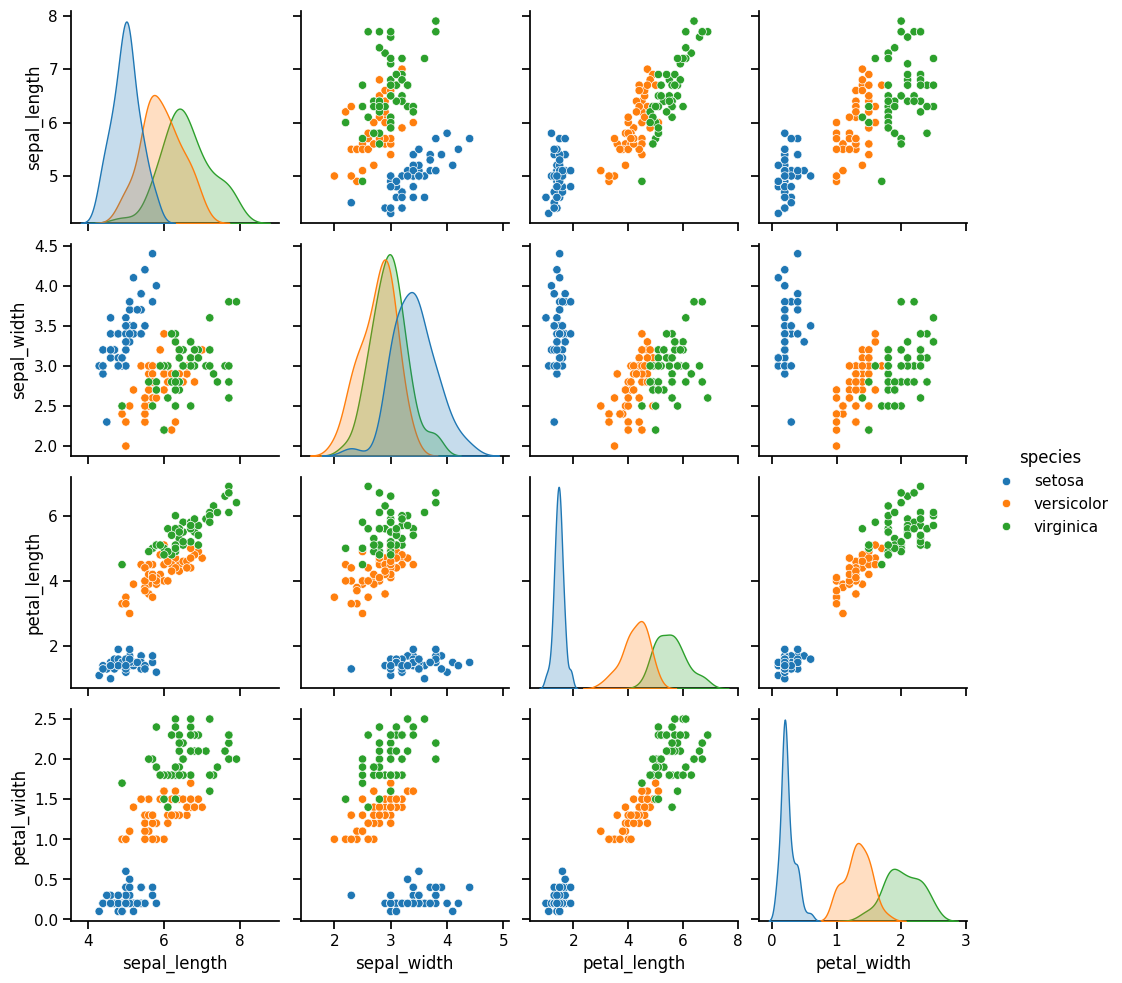

In [72]:
sns.pairplot(df, hue='species');